<a href="https://colab.research.google.com/github/MehmetCanYildirim/Projects/blob/main/CNN_model_for_fashion_MNIST_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Flatten, Dense, MaxPooling2D, Conv2D, Activation
from keras.datasets import fashion_mnist


In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train, X_test = X_train/ 255.0, X_test/ 255.0

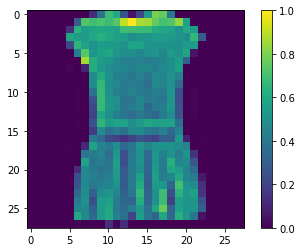

In [4]:
plt.figure()
plt.imshow(X_train[3])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
model = Sequential()
model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10,activation='softmax'))


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 16)          4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 16)                0

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [9]:
history = model.fit(x = X_train, y = y_train,batch_size=64,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
938/938 [==============================] - 68s 72ms/step - loss: 0.9560 - accuracy: 0.6445 - val_loss: 0.5349 - val_accuracy: 0.8112
Epoch 2/10
938/938 [==============================] - 67s 71ms/step - loss: 0.5075 - accuracy: 0.8148 - val_loss: 0.4704 - val_accuracy: 0.8353
Epoch 3/10
938/938 [==============================] - 67s 71ms/step - loss: 0.4343 - accuracy: 0.8444 - val_loss: 0.4206 - val_accuracy: 0.8507
Epoch 4/10
938/938 [==============================] - 67s 71ms/step - loss: 0.3942 - accuracy: 0.8566 - val_loss: 0.3890 - val_accuracy: 0.8638
Epoch 5/10
938/938 [==============================] - 67s 72ms/step - loss: 0.3691 - accuracy: 0.8667 - val_loss: 0.3824 - val_accuracy: 0.8649
Epoch 6/10
938/938 [==============================] - 67s 72ms/step - loss: 0.3489 - accuracy: 0.8732 - val_loss: 0.3970 - val_accuracy: 0.8604
Epoch 7/10
938/938 [==============================] - 67s 71ms/step - loss: 0.3308 - accuracy: 0.8790 - val_loss: 0.3861 - val_accuracy:

In [11]:
results = model.evaluate(X_test, y_test, batch_size=100)

100/100 [==============================] - 3s 26ms/step - loss: 0.3477 - accuracy: 0.8793


In [28]:
prediction = model.predict(np.array([X_test[0]]))
np.argmax(prediction)

9

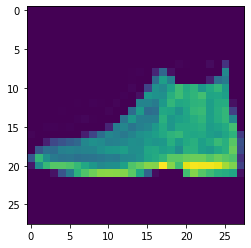

In [29]:
plt.imshow(X_test[0].reshape(28,28))
